In [ ]:
!pip install numpy
!pip install matplotlib

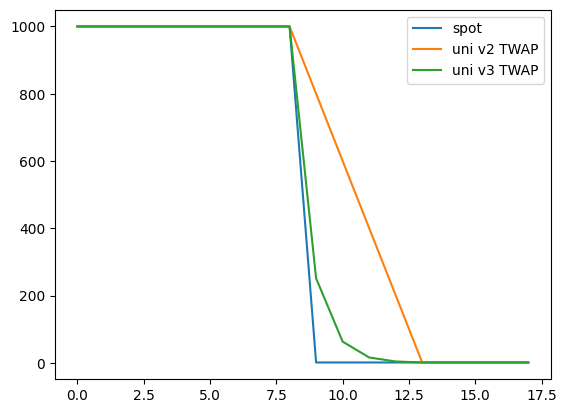

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

def price_to_tick(p):
    return math.log(p) / math.log(1.0001)

twap_duration = 5
# Price suddenly drops
prices = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# Price suddenly spikes up
# prices = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

uni_v2_cumulative_prices = []
uni_v3_cumulative_ticks = []

uni_v2_cumulative_price = 0
uni_v3_cumulative_tick = 0

for p in prices:
    uni_v2_cumulative_price += p
    uni_v3_cumulative_tick += price_to_tick(p)
    
    uni_v2_cumulative_prices.append(uni_v2_cumulative_price)
    uni_v3_cumulative_ticks.append(uni_v3_cumulative_tick)

p0 = prices[0]
uni_v2_twaps = [p0 for i in range(twap_duration)]
uni_v3_twaps = [p0 for i in range(twap_duration)]

for i in range(len(prices) - twap_duration):
    p0 = uni_v2_cumulative_prices[i]
    p1 = uni_v2_cumulative_prices[i + twap_duration]
    uni_v2_twap = (p1 - p0) / twap_duration

    uni_v2_twaps.append(uni_v2_twap)

    t0 = uni_v3_cumulative_ticks[i]
    t1 = uni_v3_cumulative_ticks[i + twap_duration]    
    avg_t = (t1 - t0) / twap_duration
    uni_v3_twap = 1.0001 ** avg_t

    uni_v3_twaps.append(uni_v3_twap)
    
plt.plot(prices)
plt.plot(uni_v2_twaps)
plt.plot(uni_v3_twaps)
plt.legend([
    "spot",
    "uni v2 TWAP",
    "uni v3 TWAP",
])
plt.show()
